In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Вывод данных из csv во всю ширину окна
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Убираем индекс

In [143]:
df0 = pd.DataFrame({"ID": ["A", "B", "A", "C", "A", "A", "C", "B"], "value": [1, 2, 4, 3, 6, 7, 3, 4]})
df_group1 = df0.groupby("ID").sum().reset_index()
df_group1
df_group2 = df0.groupby("ID", as_index=False).sum()
df_group2

,ID,value
0,A,18
1,B,6
2,C,6


1) В переменной df находится датафрэйм. Ваша задача положить в переменную  df_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'df has y rows and x columns'
где y – число строк, а x – число колонок.

In [142]:
df = pd.DataFrame({'a': [1, 2, 3], 'b': ['aaa', 'ccc', 'xxx']})  # Создадим таблицу
df0 = pd.DataFrame({"ID": ["A", "B", "A", "C", "A", "A", "C", "B"], "value": [1, 2, 4, 3, 6, 7, 3, 4]})

print(df0)

# print('\nВ датафрейме строк, столбцов:\n',df.shape, '\n') # Узнаём сколько строк и столбцов (3, 2)
# print(df.dtypes, '\n')

  ID  value
0  A      1
1  B      2
2  A      4
3  C      3
4  A      6
5  A      7
6  C      3
7  B      4


In [26]:
# 1-й вариант
template = 'df has х={} rows and у={} columns\n где y – число строк, а x – число колонок'
df_shape = template.format(df.shape[0], df.shape[1])
print('1-й вариант:\n',df_shape, '\n')

1-й вариант:
 df has х=3 rows and у=2 columns
 где y – число строк, а x – число колонок 



In [27]:
# 2-й вариант (более удобный)
df_shape = f'df has х={df.shape[0]} rows and у={df.shape[1]} columns\n где y – число строк, а x – число колонок'
print('2-й вариант (более удобный):\n', df_shape, '\n')

2-й вариант (более удобный):
 df has х=3 rows and у=2 columns
 где y – число строк, а x – число колонок 



2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения. Например, для такого датафрэйма: task2_1.png (в папке)
Ответ будет: task2_2.png (в папке)



In [34]:
np.nan
df2 = pd.DataFrame({'a': [1, None, 3], 'b': ['aaa', None, None]})  # Первый вариант
df = pd.DataFrame({'a': [1, np.nan, 3], 'b': ['aaa', np.nan, np.nan]})  # Второй вариант - нет значений
print(df)

print(df.isna(), '\n') # Проверка на пропущенные значения
na_number = df.isna().sum() # для каждой колонки указано сколько ячеек содержат пропущенные значения
print(na_number, '\n')

     a    b
0  1.0  aaa
1  NaN  NaN
2  3.0  NaN
       a      b
0  False  False
1   True   True
2  False   True 

a    1
b    2
dtype: int64 



3) Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.

In [36]:
df_types = df.dtypes #типы данных
print(df_types, '\n')

a    float64
b     object
dtype: object 



4) Внезапно оказалось, что в переменной age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.

In [38]:
df4 = pd.DataFrame({'a': [1, np.nan, 3], 'age': ['15', '33', '10']})  # Создадим таблицу
print(df4.dtypes, '\n')
df4 =df4.astype({'age': int}) #Поменяйте тип значений на целочисленный в этой колонке датафрэйма

df4['age'] = df4['age'].astype ('int') #Поменяйте тип значений на целочисленный в этой колонке датафрэйма
print(df4.dtypes, '\n')

a      float64
age     object
dtype: object 

a      float64
age      int32
dtype: object 



5) Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.

In [40]:
data = {
    'client_id' : [1, 1, 1, 3],
    'age' : [23,35,36,59],
    'sex' : ['F', 'F','F', 'M'],
    'wealth' : ['medium', 'medium', 'high', 'high']
}
df5 = pd.DataFrame(data)
# df5 = df5.drop(columns=['age', 'sex']) # 1й вариант

df5.drop(columns=['age', 'sex'], inplace=True) # Удаление колонок и сохранение результата inplace=True
df5 = df5.drop(index=[0, 1]) # Удаление строк
print(df5, '\n')



   client_id wealth
2          1   high
3          3   high 



6) А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id – дропните все строки, в которых значения в колонке client_id повторяются.

In [52]:
df6 = pd.DataFrame(data)
print(df6)
# df6.drop_duplicates(inplace=True) # Удаление по полному повтору

df6.drop_duplicates('client_id', inplace=True) # Сравнение по колонке client_id и удаление всех кроме первого
# df6.drop_duplicates(subset=['client_id'], inplace=True) # Сравнение по колонке client_id и удаление всех кроме первого
print('\n', df7)



   client_id  age sex  wealth
0          1   23   F  medium
1          1   35   F  medium
2          1   36   F    high
3          3   59   M    high

    client_id  age sex  wealth
0          1   23   F  medium
3          3   59   M    high


7) Небольшой перерыв на чистый питон. В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. При этом, если вам попался 0, то нужно прекратить этот цикл.
Например,
numbers = [1, -2, 3, 0, -3, 2]
Тогда positive_numbers должен быть:
positive_numbers = [1, 3]

In [54]:
numbers = [1, -2, 3, 0, -3, 2]

# Первый вариант
positive_numbers = []
for number in numbers:
    if number > 0:
        positive_numbers.append(number)
    elif number < 0:
        continue
    else:
        break
print(positive_numbers, '\nend')

# Второй вариант
positive_numbers1 = []
for number in numbers:
    if number > 0:
        positive_numbers1.append(number)
    elif number == 0:
        break
print(positive_numbers1, '\nend')

[1, 3] 
end
[1, 3] 
end


8) Продолжим анализ данных по поездкам. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!
Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

In [68]:
taxi = pd.read_csv('Data/taxi_peru.csv',
                   sep=';')
print('\nИсходные данные:\n',taxi.dtypes)


Исходные данные:
 journey_id           object
user_id              object
driver_id            object
taxi_id              object
icon                 object
start_type           object
start_at             object
start_lat            object
start_lon            object
end_at               object
end_lat              object
end_lon              object
end_state            object
driver_start_lat     object
driver_start_lon     object
arrived_at           object
source               object
driver_score        float64
rider_score         float64
dtype: object


In [69]:
# перевод в тип дата 1й вариант
taxi['start_at'] = pd.to_datetime(taxi.start_at)
taxi['end_at'] = pd.to_datetime(taxi.end_at)
taxi['arrived_at'] = pd.to_datetime(taxi.arrived_at)

print('\nперевод в тип дата 1й вариант:\n',taxi.dtypes)


перевод в тип дата 1й вариант:
 journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object


In [70]:
# перевод в тип дата 2й вариант
taxi2 = pd.read_csv('Data/taxi_peru.csv',
                   sep=';')
taxi2[['start_at', 'end_at', 'arrived_at']] = taxi2[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)

print('перевод в тип дата 2й вариант:\n',taxi2.dtypes)

перевод в тип дата 2й вариант:
 journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object


In [71]:
# перевод в тип дата 3й вариант
taxi3 = pd.read_csv('Data/taxi_peru.csv',
                   sep=';',
                   parse_dates=['start_at', 'end_at', 'arrived_at']) # перевод в тип дата

print('\nперевод в тип дата 3й вариант:\n',taxi3.dtypes)


перевод в тип дата 3й вариант:
 journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object


#### Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type)

In [72]:
start_type = taxi.query('start_type == "asap" or start_type == "reserved"')
print('Было',taxi.shape)
print('Стало', start_type.shape)

Было (23111, 19)
Стало (23091, 19)


9) ⭐️Задание со звёздочкой!⭐️
Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')

In [73]:
# Создание новой колонки
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')
print(taxi['wait_time'])

0        18.0
1         NaN
2         NaN
3         NaN
4        -5.0
         ... 
23106     0.0
23107    13.0
23108     9.0
23109    -7.0
23110     NaN
Name: wait_time, Length: 23111, dtype: float64


9.1)  ⭐️Задание со звёздочкой!⭐️
Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [81]:
# Первый вариант
# Отбираем, где опоздание больше 0
# Групируем по опозданиям
# Количество опозданий
# Переименуем колонку
# Сортируем по убыванию количество опозданий (лишнее, занимает много времени)
# Максимум опозданий

driver_id_late1 = taxi.query('start_type == "reserved" and wait_time > 0.0')\
    .groupby('driver_id')\
    .agg({'user_id' : 'count'})\
    .rename(columns={'user_id': 'late_number'})\
    .sort_values('late_number', ascending=False)\
    .idxmax()
print('\n', driver_id_late1)


 late_number    406921adcca37705ef527b4246c0cfea
dtype: object


In [75]:
# Второй вариант быстрее
# Отбираем, где опоздание больше 0
# сколько раз driver_id появляется в распределении

driver_id_late2 = taxi.query('start_type == "reserved" and wait_time > 0.0')\
    .driver_id\
    .value_counts()\
    .idxmax()
print('\n', driver_id_late2)


 406921adcca37705ef527b4246c0cfea


10) Подумайте, что может влиять на число опозданий из прошлого задания

11) ⭐️Задание со звёздочкой!⭐️
Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели.

In [155]:
taxi['month'] = taxi.start_at.dt.month # Месяц как дата
taxi['month_name'] = taxi.start_at.dt.month_name() # Месяц как слово

print('month\n', taxi['month'])

month
 0        11
1         6
2         5
3         6
4         9
         ..
23106     7
23107    10
23108     9
23109     4
23110     3
Name: month, Length: 23111, dtype: int64


In [151]:
taxi['weekday'] = taxi.start_at.dt.strftime('%A') # день недели как слово

print('weekday\n', taxi['weekday'])

weekday
 0         Tuesday
1         Tuesday
2          Monday
3         Tuesday
4        Saturday
           ...   
23106    Saturday
23107    Saturday
23108     Tuesday
23109    Thursday
23110     Tuesday
Name: weekday, Length: 23111, dtype: object


12) ⭐️Задание со звёздочкой!⭐️
Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина.
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8).

E:\!Data-scientist\!!LessonPre\!venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


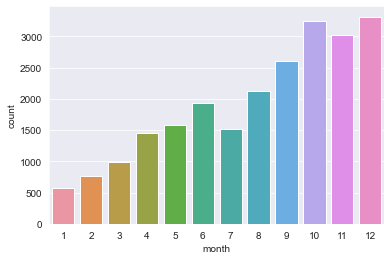

In [152]:
sns.countplot(taxi.month)
plt.show()

In [2]:
plt.figure(figsize=(12, 8)) # Изменяем размер
sns.despine() # Убираем рамку таблицы
sns.countplot(taxi.month_name,
              order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
               )
plt.show()

NameError: name 'plt' is not defined

13) ⭐️Задание со звёздочкой!⭐️
А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например:
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступило меньше всего заказов?

E:\!Data-scientist\!!LessonPre\!venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


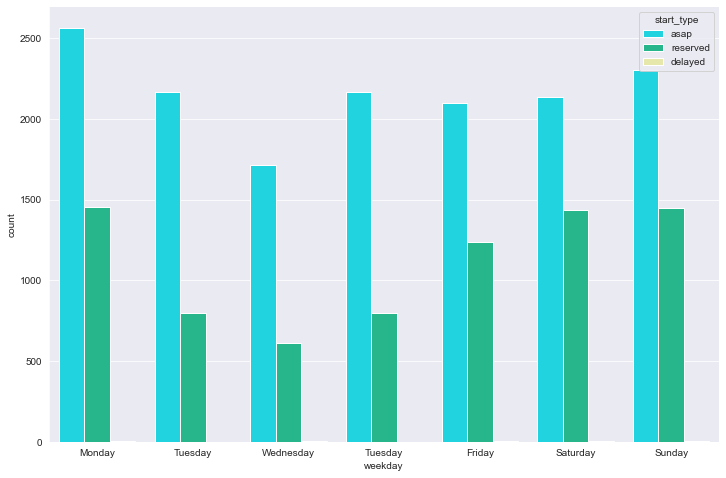

In [157]:
plt.figure(figsize=(12, 8)) # Изменяем размер
sns.countplot('weekday',
              data = taxi,
              order=['Monday', 'Tuesday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday'],
              hue = 'start_type',
              palette=['#01edff', '#10cc95', '#eff2a1']
)
sns.despine() # Убираем рамку таблицы
plt.show()

14) ⭐️Задание со звёздочкой!⭐️
Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
DAU (daily active users) – число уникальных пользователей за день
WAU (weekly active users) – число уникальных пользователей за неделю
MAU (monthly active users) – число уникальных пользователей за месяц
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения.
Могут пригодиться:
groupby – группировка
nunique – число уникальных значений
plot.line – линейная диаграмма

In [179]:
monthly_active_users1 = taxi.groupby('month')\
                            .agg({'user_id': pd.Series.nunique})\
                            .rename(columns={'user_id': 'MAU'})
print(monthly_active_users1)

       MAU
month     
1      102
2      111
3      163
4      254
5      275
6      309
7      318
8      377
9      416
10     437
11     504
12     569


In [180]:
monthly_active_users2 = taxi.groupby('month')\
                            .agg({'user_id': lambda group: group.nunique()}, as_index=False)\
                            .rename(columns={'user_id': 'MAU'})
print(monthly_active_users2)

       MAU
month     
1      102
2      111
3      163
4      254
5      275
6      309
7      318
8      377
9      416
10     437
11     504
12     569


<AxesSubplot:xlabel='month'>

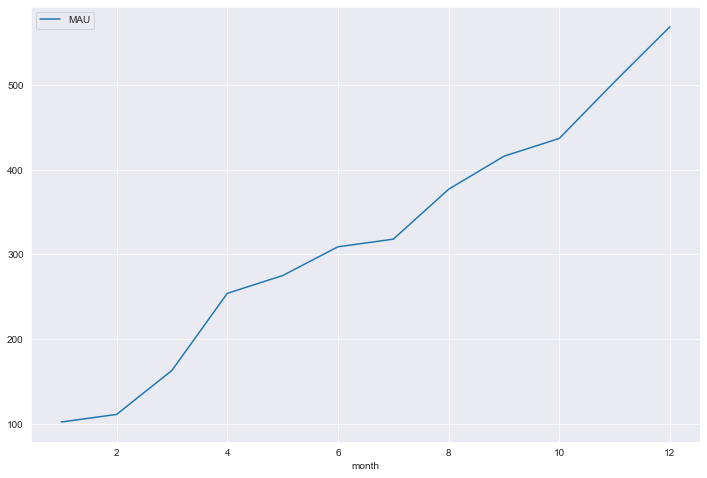

In [181]:
# Сделаем график в питоне
monthly_active_users1.plot(figsize=(12, 8))

<AxesSubplot:xlabel='month'>

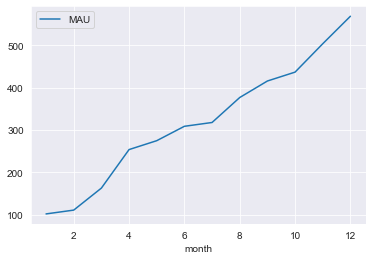

In [182]:
sns.lineplot(data=monthly_active_users1)
# mau.plot(figsize=(12, 8))

<AxesSubplot:xlabel='month'>

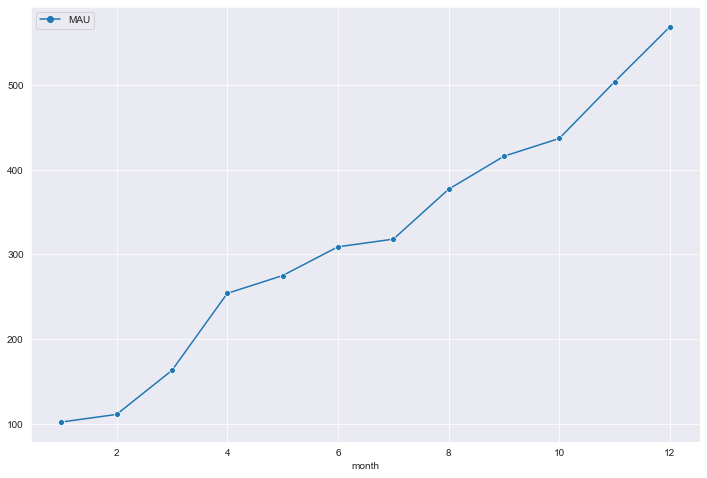

In [183]:
plt.figure(figsize=(12, 8)) # Изменяем размер
sns.lineplot(data=monthly_active_users1, markers=True)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


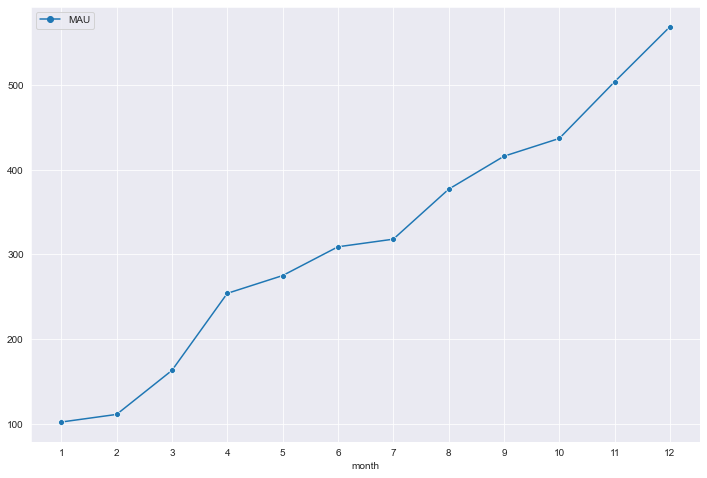

In [187]:
# Сделаем красивый график
xticks = range(1, 13, 1)
print(list(range(1, 13, 1))) # Создаём числа от 1 до 12 с шагом 1

plt.figure(figsize=(12, 8)) # Изменяем размер
sns.lineplot(data=monthly_active_users1, markers=True)

plt.xticks(xticks)
plt.show()